In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Processing of the data

Using data from mod_ALL, we removed all the matches that weren't part of Premier League's 2018-2019 season. The processed data is in the premier_league_season_data.csv file. 

In [ ]:
df = pd.read_csv("premier_league_season_data.csv")

We are interested in creating models using the mean, median and mode of bets. We will create columns storing the mean, median and mode of bets for each match in the Premier League's 2018-2019 season.

In [40]:
#remove columns given from reading the data
del df["Unnamed: 0"]
del df["Unnamed: 0.1"]

In [43]:
#get the home and away bets in separate columns
scores = df["score"].str.replace("[^0-9]", "")
df["bet.home"] = [s[0] for s in scores]
df["bet.away"] = [s[1] for s in scores]
df["bet.home"] = df["bet.home"].astype(int)
df["bet.away"] = df["bet.away"].astype(int)

In [49]:
#sort values by match
df.sort_values("match", inplace = True)

#get median for matches
bets_mean = df.groupby(["match"])[['bet.home', 'bet.away']].mean().reset_index().sort_values("match")

#get mean for matches
bets_median = df.groupby(["match"])[['bet.home', 'bet.away']].median().reset_index().sort_values("match")

#get mode for matches
bets_mode = df.groupby(["match"])[['bet.home', 'bet.away']].apply(lambda x: x.mode()).reset_index().sort_values("match")

In [59]:
#remove rows with duplicate matches
df.drop_duplicates(subset='match', inplace = True)
df.reset_index(inplace = True)

,index,_id,match,user,score,updatedAt,createdAt,points_x,competition,teams.home,...,followedBy,follows,bet_result,result,country,autoPilot,date_createdAt,date_updatedAt,bet.home,bet.away
0,803294,tKTZXC7nTZdaQ7Xcx,22vujJzPgzNszGc5N,usyvnMHDERq3aEmZA,"{""home"":0,""away"":1}",2019-02-02 07:44:19.384000+00:00,2019-02-02 07:40:27.343000+00:00,1,omDPBWsJQjQKHYiQD,B8EQQdquvN9TuMp99,...,NaN,5.0,Away Win,Away Win,MY,False,2019-02-02,2019-02-02,0,1
1,752085,qDhzGjvRDgu6KH93d,2XWLKTEoE5utrQz3v,3qgHBv5xbiwBw2e8b,"{""home"":1,""away"":3}",2018-09-22 13:07:29.323000+00:00,2018-09-22 13:07:29.323000+00:00,0,omDPBWsJQjQKHYiQD,kh3GJsxeL6F6iGBc9,...,15.0,1.0,Away Win,Draw,PT,NaN,2018-09-22,2018-09-22,1,3
2,1127043,FmYvKzq368Gq5zb9K,2bxq6XA4tWTvMDTLh,SRQeseDKxsBe3gnor,"{""home"":2,""away"":1}",2019-04-26 22:51:45.258000+00:00,2019-04-26 22:51:45.258000+00:00,0,omDPBWsJQjQKHYiQD,AXMdntDFga4JxuAdM,...,NaN,0.0,Home Win,Away Win,PT,False,2019-04-26,2019-04-26,2,1
3,505193,aPEbuAa8jvNxxQ5AD,2cRrnxq3SBSxsFuCh,f2YfBRxHNf9vBNvJK,"{""home"":2,""away"":1}",2018-10-05 18:06:13.382000+00:00,2018-10-05 18:06:13.382000+00:00,0,omDPBWsJQjQKHYiQD,4bi7hpuK4SFexMqBH,...,NaN,0.0,Home Win,Away Win,GB,False,2018-10-05,2018-10-05,2,1
4,3444,2E3G4vj87YaqJeCQR,3CnCpXW4ZfDDsAiJt,AtQ6Cr3t58BJE3TDT,"{""home"":2,""away"":1}",2018-11-26 23:50:06.753000+00:00,2018-11-26 23:50:06.753000+00:00,1,omDPBWsJQjQKHYiQD,E73yR42tCCymS95fS,...,6.0,6.0,Home Win,Home Win,PT,False,2018-11-26,2018-11-26,2,1
5,1035428,hY6EfXPno7duXQgo2,3GwXbFk2djJheHids,xTyNPLgXKKab36fGG,"{""home"":2,""away"":1}",2019-03-28 22:31:44.656000+00:00,2019-03-28 22:31:44.656000+00:00,3,omDPBWsJQjQKHYiQD,PNtguRN6oH7hbzFvh,...,NaN,37.0,Home Win,Home Win,PT,False,2019-03-28,2019-03-28,2,1
6,960382,HmnzqhqusWGzFsywA,3J2G593g2nAPvcS2G,PowDmSip4oJxyz3A8,"{""home"":2,""away"":1}",2019-02-26 19:56:28.230000+00:00,2019-02-26 19:56:28.230000+00:00,1,omDPBWsJQjQKHYiQD,kh3GJsxeL6F6iGBc9,...,NaN,3.0,Home Win,Home Win,PT,False,2019-02-26,2019-02-26,2,1
7,212239,EoEiJPaNv5W7rBnoi,3Jjq3W5wbTFoprtuc,9ZZGCWrzkRXksmkZp,"{""home"":4,""away"":0}",2019-01-28 21:16:10.779000+00:00,2019-01-28 21:16:10.779000+00:00,1,omDPBWsJQjQKHYiQD,3KcZM4qCcrSJdfzzd,...,4.0,12.0,Home Win,Home Win,GB,False,2019-01-28,2019-01-28,4,0
8,1134928,k4KLoHc6ENNbhciZb,3cmwpEZCSJaKpQQod,62NZRBSfxki55eoy5,"{""home"":0,""away"":3}",2019-04-28 18:34:45.495000+00:00,2019-04-28 18:34:45.495000+00:00,1,omDPBWsJQjQKHYiQD,DxuxSmt5X8raoxo3m,...,NaN,0.0,Away Win,Away Win,BR,False,2019-04-28,2019-04-28,0,3
9,800995,tBrhjh9RhMMzwBzjx,3szfqwSiyHcezMwuK,vttdoYHbH5s3oAtds,"{""home"":1,""away"":2}",2018-10-30 13:48:38.010000+00:00,2018-10-30 13:48:38.010000+00:00,0,omDPBWsJQjQKHYiQD,BiheeNsZwbaXYQq6p,...,NaN,0.0,Away Win,Draw,BR,False,2018-10-30,2018-10-30,1,2


In [60]:
#add mean, median and mode of bets as columns to the 380 matches in data
df["bet.median.home"] = bets_median["bet.home"]
df["bet.median.away"] = bets_median["bet.away"]
df["bet.mean.home"] = bets_mean["bet.home"]
df["bet.mean.away"] = bets_mean["bet.away"]
df["bet.mode.home"] = bets_mode["bet.home"]
df["bet.mode.away"] = bets_mode["bet.away"]

In [228]:
df[df['result'] == 'Draw'].shape

(71, 37)

Next, we will try predicting the scores of matches using multiple methods. For this we will divide the data into two: 70% of the data will go towards training, 30% of the data will go towards testing.

In [119]:
from sklearn.model_selection import train_test_split

independent = df[['home_team','away_team', 'bet.home', 'bet.away', 'bet.median.home', 'bet.median.away', 'bet.mean.home', 'bet.mean.away', 'bet.mode.home', 'bet.mode.away', 'bet_result']]
target = df[['score.home', 'score.away', 'result']]

X_train, X_test, y_train, y_test = train_test_split(independent, target, test_size = 0.3, random_state=6)

X_train = X_train.reset_index()
y_train = y_train.reset_index()
train_data = X_train.merge(y_train, on='index')

X_test = X_test.reset_index()
y_test = y_test.reset_index()
test_data = X_test.merge(y_test, on='index')

del train_data['index']
del test_data['index']

For evaluating our models we will want to be able to draw a line of best fit to assess the correlation between our predictions and our actual values.

In [120]:
#find coefficients for line of best fit
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum(xi*yi for xi,yi in zip(X, Y)) - n * xbar * ybar
    denum = sum(xi**2 for xi in X) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

In [121]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Predicting using actual scores only

To evaluate whether adding the bets improves our model, we will first look at how well can a model predict the scores using past scores only for training.

In [122]:
#create dataframe with actual scores only
model_data_hist_train = pd.concat([train_data[['home_team','away_team', 'score.home']].assign(home=1).rename(
            columns={'home_team':'team', 'away_team':'opponent', 'score.home': 'goals'}),
           train_data[['away_team','home_team', 'score.away']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent', 'score.away': 'goals'})])

model_data_hist_test = pd.concat([test_data[['home_team','away_team', 'score.home']].assign(home=1).rename(
            columns={'home_team':'team', 'away_team':'opponent', 'score.home': 'goals'}),
            test_data[['away_team','home_team', 'score.away']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent', 'score.away': 'goals'})])

In [123]:
poisson_model_hist = smf.glm(formula="goals ~ home + team + opponent", data=model_data_hist_train, 
                        family=sm.families.Poisson()).fit()
poisson_model_hist.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  532
Model:                            GLM   Df Residuals:                      492
Model Family:                 Poisson   Df Model:                           39
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -739.37
Date:                Wed, 31 Jul 2019   Deviance:                       536.70
Time:                        15:44:50   Pearson chi2:                     457.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.2600      0.257      1.010      0.312      -0.244       0.764
team[T.Arsenal]                         0.6087      0.251      2.429      0.015       0.118       1.100
team[T.Brighton & Hove Albion]         -0.1340      0.287     -0.467      0.641      -0.697       0.429
team[T.Burnley]                         0.0595      0.276      0.216      0.829      -0.481       0.600
team[T.Cardiff City]                    0.0624      0.272      0.230      0.818      -0.470       0.595
team[T.Chelsea]                         0.4186      0.260      1.611      0.107      -0.091       0.928
team[T.Crystal Palace]                  0.3671      0.279      1.314      0.189      -0.181       0.915
team[T.Everton]                         0.2824      0.262      1.079      0.280      -0.230       0.795
team[T.Fulham]                          0.0099      0.280      0.035      0.972      -0.540       0.559
team[T.Huddersfield Town]              -0.8549      0.355     -2.411      0.016      -1.550      -0.160
team[T.Leicester City]                  0.2651      0.272      0.974      0.330      -0.268       0.798
team[T.Liverpool]                       0.8267      0.237      3.494      0.000       0.363       1.291
team[T.Manchester City]                 0.8057      0.239      3.374      0.001       0.338       1.274
team[T.Manchester United]               0.4509      0.252      1.788      0.074      -0.043       0.945
team[T.Newcastle United]               -0.1206      0.285     -0.423      0.673      -0.680       0.439
team[T.Southampton]                    -0.0813      0.304     -0.267      0.790      -0.678       0.516
team[T.Tottenham Hotspur]               0.5611      0.252      2.223      0.026       0.066       1.056
team[T.Watford]                         0.2666      0.258      1.035      0.301      -0.239       0.772
team[T.West Ham United]                 0.1886      0.264      0.715      0.475      -0.328       0.705
team[T.Wolverhampton Wanderers]         0.0705      0.270      0.261      0.794      -0.459       0.601
opponent[T.Arsenal]                    -0.3751      0.227     -1.650      0.099      -0.821       0.070
opponent[T.Brighton & Hove Albion]     -0.2464      0.211     -1.170      0.242      -0.659       0.167
opponent[T.Burnley]                    -0.0526      0.209     -0.252      0.801      -0.462       0.356
opponent[T.Cardiff City]                0.0109      0.200      0.054      0.957      -0.381       0.403
opponent[T.Chelsea]                    -0.6265      0.248     -2.528      0.011      -1.112      -0.141
opponent[T.Crystal Palace]             -0.3908      0.241     -1.623      0.105      -0.863       0.081
opponent[T.Everton]                    -0.3781      0.222     -1.70

In [124]:
#make predictions on the testing dataset
predictions = poisson_model_hist.predict(model_data_hist_test[['home', 'team', 'opponent']])

In [125]:
#add the predictions as a column to the test dataframe
model_data_hist_test["pred"] = predictions

best fit line:
y = 1.07 + 0.21x


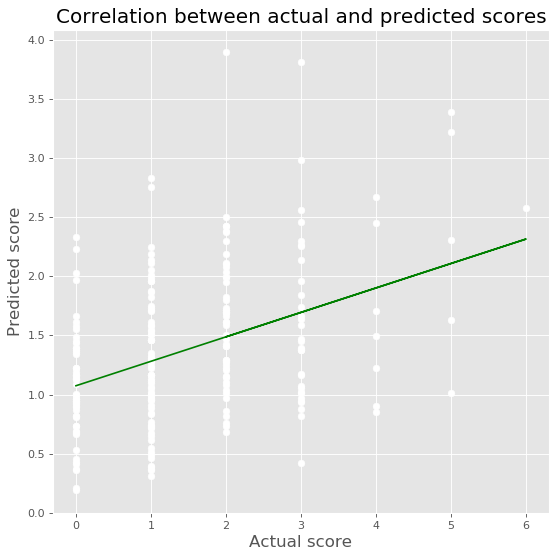

Correlation between predicted and actual scores using historical data: 0.4020


In [126]:
#calculate correlation between predictions and actual score
X = model_data_hist_test.goals
y = model_data_hist_test.pred

%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(X, y, c = "white")

# solution
a, b = best_fit(X,y)

yfit = [a + b * x for x in X]
plt.plot(X, yfit, 'g')

plt.xlabel("Actual score",fontsize=15)
plt.ylabel("Predicted score",fontsize=15)
plt.title("Correlation between actual and predicted scores", fontsize=18)
plt.show()

#get correlation value
print("Correlation between predicted and actual scores using historical data:", "{0:.4f}".format(np.corrcoef(X,y)[0][1]))

# Predicting scores using bets

## Using Median

In [127]:
#create dataframe with median of bets
model_data_med_train = pd.concat([train_data[['home_team','away_team', 'bet.median.home', 'score.home']].assign(home=1).rename(
            columns={'home_team':'team', 'away_team':'opponent', 'bet.median.home':'bet', 'score.home': 'goals'}),
            train_data[['away_team','home_team', 'bet.median.away', 'score.away']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent', 'bet.median.away':'bet', 'score.away': 'goals'})])

model_data_med_test = pd.concat([test_data[['home_team','away_team', 'bet.median.home', 'score.home']].assign(home = 1).rename(
            columns={'home_team':'team', 'away_team':'opponent', 'bet.median.home':'bet', 'score.home': 'goals'}),
            test_data[['away_team','home_team', 'bet.median.away', 'score.away']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent', 'bet.median.away':'bet', 'score.away': 'goals'})])

In [128]:
poisson_model_median_bets = smf.glm(formula="goals ~ home + team + opponent + bet", data=model_data_med_train, 
                        family=sm.families.Poisson()).fit()
poisson_model_median_bets.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  532
Model:                            GLM   Df Residuals:                      491
Model Family:                 Poisson   Df Model:                           40
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -736.93
Date:                Wed, 31 Jul 2019   Deviance:                       531.83
Time:                        15:44:57   Pearson chi2:                     454.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.5413      0.287      1.889      0.059      -0.020       1.103
team[T.Arsenal]                         0.8396      0.272      3.092      0.002       0.307       1.372
team[T.Brighton & Hove Albion]         -0.1949      0.288     -0.676      0.499      -0.760       0.370
team[T.Burnley]                        -0.0105      0.277     -0.038      0.970      -0.554       0.533
team[T.Cardiff City]                   -0.0121      0.274     -0.044      0.965      -0.549       0.525
team[T.Chelsea]                         0.6730      0.284      2.366      0.018       0.115       1.230
team[T.Crystal Palace]                  0.3648      0.279      1.306      0.192      -0.183       0.912
team[T.Everton]                         0.4307      0.270      1.594      0.111      -0.099       0.960
team[T.Fulham]                         -0.0539      0.282     -0.191      0.848      -0.606       0.498
team[T.Huddersfield Town]              -0.9940      0.360     -2.760      0.006      -1.700      -0.288
team[T.Leicester City]                  0.4034      0.279      1.445      0.149      -0.144       0.951
team[T.Liverpool]                       1.1920      0.289      4.130      0.000       0.626       1.758
team[T.Manchester City]                 1.2454      0.311      3.999      0.000       0.635       1.856
team[T.Manchester United]               0.7040      0.277      2.545      0.011       0.162       1.246
team[T.Newcastle United]               -0.1449      0.286     -0.508      0.612      -0.705       0.415
team[T.Southampton]                    -0.1189      0.305     -0.390      0.697      -0.717       0.479
team[T.Tottenham Hotspur]               0.8184      0.278      2.944      0.003       0.274       1.363
team[T.Watford]                         0.3535      0.261      1.356      0.175      -0.158       0.864
team[T.West Ham United]                 0.2942      0.268      1.098      0.272      -0.231       0.819
team[T.Wolverhampton Wanderers]         0.1995      0.277      0.721      0.471      -0.343       0.741
opponent[T.Arsenal]                    -0.5506      0.241     -2.285      0.022      -1.023      -0.078
opponent[T.Brighton & Hove Albion]     -0.2551      0.211     -1.210      0.226      -0.668       0.158
opponent[T.Burnley]                    -0.0520      0.209     -0.249      0.803      -0.461       0.357
opponent[T.Cardiff City]                0.0328      0.200      0.164      0.870      -0.360       0.426
opponent[T.Chelsea]                    -0.8517      0.268     -3.173      0.002      -1.378      -0.326
opponent[T.Crystal Palace]             -0.3914      0.241     -1.625      0.104      -0.863       0.081
opponent[T.Everton]                    -0.4594      0.224     -2.04

In [129]:
#make predictions on the testing dataset
predictions = poisson_model_median_bets.predict(model_data_med_test[['home', 'team', 'opponent', 'bet']])

In [130]:
#add the predictions as a column to the test dataframe
model_data_med_test["pred"] = predictions

best fit line:
y = 1.06 + 0.21x


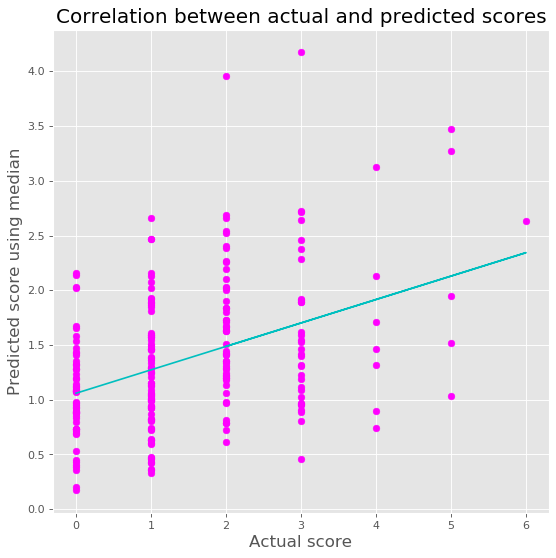

Correlation between predicted and actual scores using median: 0.4073


In [131]:
X = model_data_med_test.goals
y = model_data_med_test.pred

%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(X, y, c = "magenta")

# solution
a, b = best_fit(X,y)

yfit = [a + b * x for x in X]
plt.plot(X, yfit, 'c')

plt.xlabel("Actual score",fontsize=15)
plt.ylabel("Predicted score using median",fontsize=15)
plt.title("Correlation between actual and predicted scores", fontsize=18)
plt.show()

#get correlation value
print("Correlation between predicted and actual scores using median:", "{0:.4f}".format(np.corrcoef(X,y)[0][1]))

## Using Mode

# Apply cross-validation

In [209]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import poisson,skellam

def simulate_match(foot_model, homeTeam, awayTeam, bet, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam, 'bet': bet, 'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam, 'bet': bet, 'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

In [245]:
# same simulation but using bets for both home and away team at the same time
def simulate_match_bets(foot_model, homeTeam, awayTeam, homeBet, awayBet, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam, 'bet_team': homeBet, 'bet_opponent': awayBet, 'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam, 'bet_team': awayBet, 'bet_opponent': homeBet, 'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

## Using Median

In [185]:
predictions

0      1.620362
2      2.293857
4      1.493520
5      2.132378
6      1.284554
         ...   
375    0.840034
376    1.245808
377    0.754215
378    0.742918
379    0.886184
Length: 608, dtype: float64

In [188]:
df.result

0      Away Win
1          Draw
2      Away Win
3      Away Win
4      Home Win
         ...   
375    Away Win
376    Away Win
377    Home Win
378    Home Win
379        Draw
Name: result, Length: 380, dtype: object

In [191]:
model_data_med_train.head()

,team,opponent,bet,goals,home
0,Everton,Wolverhampton Wanderers,1,1.0,1
1,West Ham United,Chelsea,1,0.0,1
2,Tottenham Hotspur,West Ham United,2,0.0,1
3,Watford,AFC Bournemouth,2,0.0,1
7,Chelsea,Huddersfield Town,3,5.0,1


For cross-validation, the scores that I am looking at are for the whole dataset, instead of the test dataset only.

In [255]:
# manual cross-validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support as score

r2_scores = []
rmsle_scores = []
rmse_scores = []
#divide the data into 5 groups
kfold = KFold(5, True, 1)



precisons_score = []
recall_score = []
fscore_score = []
support_score = []

for train, test in kfold.split(df):
    #create new dataframe to store outcome predictions
    df_pred = df.copy()
    train_data = df[df.index.isin(train)]
    test_data = df[df.index.isin(test)]
    model_data_med_train = pd.concat([train_data[['home_team','away_team', 'bet.median.home', 'score.home']].assign(home=1).rename(
            columns={'home_team':'team', 'away_team':'opponent', 'bet.median.home':'bet', 'score.home': 'goals'}),
            train_data[['away_team','home_team', 'bet.median.away', 'score.away']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent', 'bet.median.away':'bet', 'score.away': 'goals'})])

    model_data_med_test = pd.concat([test_data[['home_team','away_team', 'bet.median.home', 'score.home']].assign(home = 1).rename(
            columns={'home_team':'team', 'away_team':'opponent', 'bet.median.home':'bet', 'score.home': 'goals'}),
            test_data[['away_team','home_team', 'bet.median.away', 'score.away']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent', 'bet.median.away':'bet', 'score.away': 'goals'})])

    #fit the model
    poisson_model_median_bets = smf.glm(formula="goals ~ home + team + opponent + bet", data=model_data_med_train, 
                        family=sm.families.Poisson()).fit()
    
    #simulation = simulate_match(poisson_model_median_bets, 'Leicester City', 'Watford', model_data_med_test[(model_data_med_test['team'] == 'Leicester City') & (model_data_med_test['opponent'] == 'Watford')]['bet'])
    #np.sum(np.tril(simulation, -1))
    
   # record the outcome of the simulation
    for index, row in df_pred.iterrows():
        #print(poisson_model_median_bets.summary(), row['team'], row['opponent'])
        simulation = simulate_match(poisson_model_median_bets, row['home_team'], row['away_team'], row['bet.median.home'], max_goals = 6)
        max_prob = max([np.sum(np.tril(simulation, -1)), np.sum(np.diag(simulation)), np.sum(np.triu(simulation, 1))])
        df_pred.loc[index, 'Home Win'] = np.sum(np.tril(simulation, -1))
        df_pred.loc[index, 'Draw'] = np.sum(np.diag(simulation))
        df_pred.loc[index, 'Away Win'] = np.sum(np.triu(simulation, 1))
        # WHAT IS HAPPENING WITH THIS IF STATEMENT
        df_pred.loc[index, 'pred_result'] = ['Home Win' if (max_prob == np.sum(np.tril(simulation, -1))) else 
                                        'Draw' if (max_prob == np.sum(np.triu(simulation, -1))) else 'Away Win']
        
        
    print(df_pred.head(10))
  
    
    precision, recall, fscore, support = score(df_pred['result'], df_pred['pred_result'])
    precisons_score.append(precision)
    recall_score.append(recall)
    fscore_score.append(fscore)
    support_score.append(support)
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    
#     #make predictions on the testing dataset
#     predictions = poisson_model_median_bets.predict(model_data_med_test[['home', 'team', 'opponent', 'bet']])
    
#     #add the accuracy metrics for this train-test data
#     r2_scores.append(r2_score(model_data_med_test['goals'], predictions))
#     rmsle_scores.append(mean_squared_log_error(model_data_med_test['goals'], predictions))
#     rmse_scores.append(mean_squared_error(model_data_med_test['goals'], predictions))

     index                _id              match               user  \
0   803294  tKTZXC7nTZdaQ7Xcx  22vujJzPgzNszGc5N  usyvnMHDERq3aEmZA   
1   752085  qDhzGjvRDgu6KH93d  2XWLKTEoE5utrQz3v  3qgHBv5xbiwBw2e8b   
2  1127043  FmYvKzq368Gq5zb9K  2bxq6XA4tWTvMDTLh  SRQeseDKxsBe3gnor   
3   505193  aPEbuAa8jvNxxQ5AD  2cRrnxq3SBSxsFuCh  f2YfBRxHNf9vBNvJK   
4     3444  2E3G4vj87YaqJeCQR  3CnCpXW4ZfDDsAiJt  AtQ6Cr3t58BJE3TDT   
5  1035428  hY6EfXPno7duXQgo2  3GwXbFk2djJheHids  xTyNPLgXKKab36fGG   
6   960382  HmnzqhqusWGzFsywA  3J2G593g2nAPvcS2G  PowDmSip4oJxyz3A8   
7   212239  EoEiJPaNv5W7rBnoi  3Jjq3W5wbTFoprtuc  9ZZGCWrzkRXksmkZp   
8  1134928  k4KLoHc6ENNbhciZb  3cmwpEZCSJaKpQQod  62NZRBSfxki55eoy5   
9   800995  tBrhjh9RhMMzwBzjx  3szfqwSiyHcezMwuK  vttdoYHbH5s3oAtds   

                 score                         updatedAt  \
0  {"home":0,"away":1}  2019-02-02 07:44:19.384000+00:00   
1  {"home":1,"away":3}  2018-09-22 13:07:29.323000+00:00   
2  {"home":2,"away":1}  2019-04-26 22:

     index                _id              match               user  \
0   803294  tKTZXC7nTZdaQ7Xcx  22vujJzPgzNszGc5N  usyvnMHDERq3aEmZA   
1   752085  qDhzGjvRDgu6KH93d  2XWLKTEoE5utrQz3v  3qgHBv5xbiwBw2e8b   
2  1127043  FmYvKzq368Gq5zb9K  2bxq6XA4tWTvMDTLh  SRQeseDKxsBe3gnor   
3   505193  aPEbuAa8jvNxxQ5AD  2cRrnxq3SBSxsFuCh  f2YfBRxHNf9vBNvJK   
4     3444  2E3G4vj87YaqJeCQR  3CnCpXW4ZfDDsAiJt  AtQ6Cr3t58BJE3TDT   
5  1035428  hY6EfXPno7duXQgo2  3GwXbFk2djJheHids  xTyNPLgXKKab36fGG   
6   960382  HmnzqhqusWGzFsywA  3J2G593g2nAPvcS2G  PowDmSip4oJxyz3A8   
7   212239  EoEiJPaNv5W7rBnoi  3Jjq3W5wbTFoprtuc  9ZZGCWrzkRXksmkZp   
8  1134928  k4KLoHc6ENNbhciZb  3cmwpEZCSJaKpQQod  62NZRBSfxki55eoy5   
9   800995  tBrhjh9RhMMzwBzjx  3szfqwSiyHcezMwuK  vttdoYHbH5s3oAtds   

                 score                         updatedAt  \
0  {"home":0,"away":1}  2019-02-02 07:44:19.384000+00:00   
1  {"home":1,"away":3}  2018-09-22 13:07:29.323000+00:00   
2  {"home":2,"away":1}  2019-04-26 22:

     index                _id              match               user  \
0   803294  tKTZXC7nTZdaQ7Xcx  22vujJzPgzNszGc5N  usyvnMHDERq3aEmZA   
1   752085  qDhzGjvRDgu6KH93d  2XWLKTEoE5utrQz3v  3qgHBv5xbiwBw2e8b   
2  1127043  FmYvKzq368Gq5zb9K  2bxq6XA4tWTvMDTLh  SRQeseDKxsBe3gnor   
3   505193  aPEbuAa8jvNxxQ5AD  2cRrnxq3SBSxsFuCh  f2YfBRxHNf9vBNvJK   
4     3444  2E3G4vj87YaqJeCQR  3CnCpXW4ZfDDsAiJt  AtQ6Cr3t58BJE3TDT   
5  1035428  hY6EfXPno7duXQgo2  3GwXbFk2djJheHids  xTyNPLgXKKab36fGG   
6   960382  HmnzqhqusWGzFsywA  3J2G593g2nAPvcS2G  PowDmSip4oJxyz3A8   
7   212239  EoEiJPaNv5W7rBnoi  3Jjq3W5wbTFoprtuc  9ZZGCWrzkRXksmkZp   
8  1134928  k4KLoHc6ENNbhciZb  3cmwpEZCSJaKpQQod  62NZRBSfxki55eoy5   
9   800995  tBrhjh9RhMMzwBzjx  3szfqwSiyHcezMwuK  vttdoYHbH5s3oAtds   

                 score                         updatedAt  \
0  {"home":0,"away":1}  2019-02-02 07:44:19.384000+00:00   
1  {"home":1,"away":3}  2018-09-22 13:07:29.323000+00:00   
2  {"home":2,"away":1}  2019-04-26 22:

In [256]:
# assessing accuracy for outcomes
print(np.mean(precisons_score, axis=0))
print(np.mean(recall_score, axis=0))
print(np.mean(fscore_score, axis=0))
print(np.mean(support_score, axis=0))

[0.57031925 0.         0.62882924]
[0.6921875 0.        0.7801105]
[0.62521666 0.         0.69626028]
[128.  71. 181.]


Since a model that predicts from using both bets on home and away might perform better, we could include bets for both home and away in each row - so whether we predict actual score for home or away team, the model has access to both.

In [287]:
# USING BETS FOR BOTH HOME AND AWAY IN THE SAME ROW

precisons_score = []
recall_score = []
fscore_score = []
support_score = []

precisons_score_test = []
recall_score_test = []
fscore_score_test = []
support_score_test = []

for train, test in kfold.split(df):
    #create new dataframe to store outcome predictions
    df_pred = df.copy()
    train_data = df[df.index.isin(train)]
    test_data = df[df.index.isin(test)]
    model_data_med_train = pd.concat([train_data[['home_team','away_team', 'bet.median.home', 'bet.median.away', 'score.home']].assign(home=1).rename(
            columns={'home_team':'team', 'away_team':'opponent', 'bet.median.home':'bet_team', 'bet.median.away':'bet_opponent', 'score.home': 'goals'}),
            train_data[['away_team','home_team', 'bet.median.away', 'bet.median.home', 'score.away']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent', 'bet.median.away': 'bet_team', 'bet.median.home':'bet_opponent', 'score.away': 'goals'})])

    model_data_med_test = pd.concat([test_data[['home_team','away_team', 'bet.median.home', 'bet.median.away', 'score.home', 'result']].assign(home = 1).rename(
            columns={'home_team':'team', 'away_team':'opponent', 'bet.median.home':'bet_team', 'bet.median.away':'bet_opponent', 'score.home': 'goals'}),
            test_data[['away_team','home_team', 'bet.median.away', 'bet.median.home', 'score.away', 'result']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent', 'bet.median.away':'bet_team', 'bet.median.home':'bet_opponent', 'score.away': 'goals'})])
    
    
    #fit the model
    poisson_model_median_bets = smf.glm(formula="goals ~ home + team + opponent + bet_team + bet_opponent", data=model_data_med_train, 
                        family=sm.families.Poisson()).fit()
     
    # record the outcome of the simulation
    for index, row in df_pred.iterrows():
        #print(poisson_model_median_bets.summary(), row['team'], row['opponent'])
        simulation = simulate_match(poisson_model_median_bets, row['home_team'], row['away_team'], row['bet.median.home'], max_goals = 6)
        max_prob = max([np.sum(np.tril(simulation, -1)), np.sum(np.diag(simulation)), np.sum(np.triu(simulation, 1))])
        df_pred.loc[index, 'Home Win'] = np.sum(np.tril(simulation, -1))
        df_pred.loc[index, 'Draw'] = np.sum(np.diag(simulation))
        df_pred.loc[index, 'Away Win'] = np.sum(np.triu(simulation, 1))
        # WHAT IS HAPPENING WITH THIS IF STATEMENT
        df_pred.loc[index, 'pred_result'] = ['Home Win' if (max_prob == np.sum(np.tril(simulation, -1))) else 
                                        'Draw' if (max_prob == np.sum(np.triu(simulation, -1))) else 'Away Win']
        
        
    print(df_pred.head(10))
  
    
    precision, recall, fscore, support = score(df_pred['result'], df_pred['pred_result'])
    precisons_score.append(precision)
    recall_score.append(recall)
    fscore_score.append(fscore)
    support_score.append(support)
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    
    # record the outcome of the simulation - test dataset
    for index, row in model_data_med_test.iterrows():
        #print(poisson_model_median_bets.summary(), row['team'], row['opponent'])
        simulation = simulate_match_bets(poisson_model_median_bets, row['team'], row['opponent'], row['bet_team'], row['bet_opponent'], max_goals = 6)
        max_prob = max([np.sum(np.tril(simulation, -1)), np.sum(np.diag(simulation)), np.sum(np.triu(simulation, 1))])
        model_data_med_test.loc[index, 'Home Win'] = np.sum(np.tril(simulation, -1))
        model_data_med_test.loc[index, 'Draw'] = np.sum(np.diag(simulation))
        model_data_med_test.loc[index, 'Away Win'] = np.sum(np.triu(simulation, 1))
        model_data_med_test.loc[index, 'pred_result'] = ['Home Win' if max_prob == np.sum(np.tril(simulation, -1)) else 
                                        'Draw' if max_prob == np.sum(np.triu(simulation, -1)) else 'Away Win'] 
  
   
    precision, recall, fscore, support = score(model_data_med_test['result'], model_data_med_test['pred_result'])
    precisons_score_test.append(precision)
    recall_score_test.append(recall)
    fscore_score_test.append(fscore)
    support_score_test.append(support)
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'bet_team' is not defined
    goals ~ home + team + opponent + bet_team + bet_opponent
                                     ^^^^^^^^

In [286]:
print(np.mean(precisons_score_test, axis=0))
print(np.mean(recall_score_test, axis=0))
print(np.mean(fscore_score_test, axis=0))
print(np.mean(support_score_test, axis=0))

[0.12051649 0.         0.34692681]
[0.12526047 0.         0.4870913 ]
[0.1198748  0.         0.40091111]
[51.2 28.4 72.4]


In [184]:
# take average of recorded scores
print("Coefficient of determination is:", sum(r2_scores)/len(r2_scores))
print("Mean squared log error is:", sum(rmsle_scores)/len(rmsle_scores))
print("Mean squared error is:", sum(rmse_scores)/len(rmse_scores))

Coefficient of determination is: 0.2797241543927186
Mean squared log error is: 0.2245973797865261
Mean squared error is: 1.135565007158966


In [180]:
# take average of recorded scores
print("Coefficient of determination is:", sum(r2_scores)/len(r2_scores))
print("Mean squared log error is:", sum(rmsle_scores)/len(rmsle_scores))
print("Mean squared error is:", sum(rmse_scores)/len(rmse_scores))

Coefficient of determination is: 0.16162703067460515
Mean squared log error is: 0.2504363404880345
Mean squared error is: 1.3012668192763068


## Using only previous actual scores

In [181]:
# manual cross-validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2_scores = []
rmsle_scores = []
rmse_scores = []
#divide the data into 5 groups
kfold = KFold(5, True, 1)
for train, test in kfold.split(df):
    train_data = df[df.index.isin(train)]
    test_data = df[df.index.isin(test)]
    #create dataframe with actual scores only
    model_data_hist_train = pd.concat([train_data[['home_team','away_team', 'score.home']].assign(home=1).rename(
            columns={'home_team':'team', 'away_team':'opponent', 'score.home': 'goals'}),
           train_data[['away_team','home_team', 'score.away']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent', 'score.away': 'goals'})])

    model_data_hist_test = pd.concat([test_data[['home_team','away_team', 'score.home']].assign(home=1).rename(
            columns={'home_team':'team', 'away_team':'opponent', 'score.home': 'goals'}),
            test_data[['away_team','home_team', 'score.away']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent', 'score.away': 'goals'})])
    #fit the model
    poisson_model_hist = smf.glm(formula="goals ~ home + team + opponent", data=model_data_hist_train, 
                        family=sm.families.Poisson()).fit()
    #make predictions on the testing dataset
    predictions = poisson_model_hist.predict(model_data_hist_test[['home', 'team', 'opponent']])
    #add the accuracy metrics for this train-test data
    r2_scores.append(r2_score(model_data_med_test['goals'], predictions))
    rmsle_scores.append(mean_squared_log_error(model_data_med_test['goals'], predictions))
    rmse_scores.append(mean_squared_error(model_data_med_test['goals'], predictions))

In [182]:
# take average of recorded scores
print("Coefficient of determination is:", sum(r2_scores)/len(r2_scores))
print("Mean squared log error is:", sum(rmsle_scores)/len(rmsle_scores))
print("Mean squared error is:", sum(rmse_scores)/len(rmse_scores))

Coefficient of determination is: -0.1711898501469457
Mean squared log error is: 0.32767573237676634
Mean squared error is: 1.8792568440377238


# Using historical data

## Using last 3 matches

Since we are using a Poisson model we are interested in looking at the most recent 3 matches of each team. If a team hasn't played three matches yet, we will use their mean from the previous seasons. 
We are reading in historical data from the Premier League seasons 2017-2018 and 2018-2019

In [302]:
hist_data = pd.read_csv("Premier_League.csv")

In [303]:
hist_data.head()

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HY,AY,HR,AR,B365H,B365D,B365A,Home_id,Away_id,competition
0,0,E0,2018-08-10,Man United,Leicester,2,1,H,1,0,...,2,1,0,0,"1,57","3,9","7,5",PNtguRN6oH7hbzFvh,E73yR42tCCymS95fS,omDPBWsJQjQKHYiQD
1,1,E0,2018-08-11,Bournemouth,Cardiff,2,0,H,1,0,...,1,1,0,0,"1,9","3,6","4,5",JM8d8cCuhNTHf3GCQ,TDcYR9bF89v2cYJFH,omDPBWsJQjQKHYiQD
2,2,E0,2018-08-11,Fulham,Crystal Palace,0,2,A,0,1,...,1,2,0,0,"2,5","3,4",3,RagxSBofXJuQFBd7u,vvMHrMNsxnbkiFM9e,omDPBWsJQjQKHYiQD
3,3,E0,2018-08-11,Huddersfield,Chelsea,0,3,A,0,2,...,2,1,0,0,"6,5",4,"1,61",NLPNTndx9xGEpAbtE,3KcZM4qCcrSJdfzzd,omDPBWsJQjQKHYiQD
4,4,E0,2018-08-11,Newcastle,Tottenham,1,2,A,1,2,...,2,2,0,0,"3,9","3,5","2,04",DxuxSmt5X8raoxo3m,AXMdntDFga4JxuAdM,omDPBWsJQjQKHYiQD


In [304]:
hist_data.columns

Index(['Unnamed: 0', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A',
       'Home_id', 'Away_id', 'competition'],
      dtype='object')

In [305]:
#rename columns, and drop the additional index column
hist_data.rename(columns = {'FTHG':'Full Time Home Goals', 'FTAG':'Full Time Away Goals', 'FTR':'Full Time Result', 'HTHG':'Half Time Home Team Goals', 'HTAG':'Half Time Away Team Goals', 'HTR':'Half Time Result', 'HS':'Home Shots', 'AS':'Away Shots', 'HST':'Home Target Shots', 'AST':'Away Target Shots', 'HF':'Home Team Fools', 'AF':'Away Team Fools','HC':'Home Team Corners', 'AC':'Away Team Corners', 'HY':'Home Team Yellow Cards', 'AY':'Home Team Yellow Cards', 'HR':'Home Team Red Cards', 'AR':'Home Away Red Cards'}, inplace = True)
del hist_data['Unnamed: 0']

In [306]:
hist_data.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'Full Time Home Goals',
       'Full Time Away Goals', 'Full Time Result', 'Half Time Home Team Goals',
       'Half Time Away Team Goals', 'Half Time Result', 'Referee',
       'Home Shots', 'Away Shots', 'Home Target Shots', 'Away Target Shots',
       'Home Team Fools', 'Away Team Fools', 'Home Team Corners',
       'Away Team Corners', 'Home Team Yellow Cards', 'Home Team Yellow Cards',
       'Home Team Red Cards', 'Home Away Red Cards', 'B365H', 'B365D', 'B365A',
       'Home_id', 'Away_id', 'competition'],
      dtype='object')

In [406]:
# create dataframe to use for training
from sklearn.model_selection import train_test_split

independent = df[['home_team','away_team', 'teams.home', 'teams.away', 'bet.home', 'bet.away', 'bet.median.home', 'bet.median.away', 'bet.mean.home', 'bet.mean.away', 'bet.mode.home', 'bet.mode.away', 'bet_result']]
target = df[['score.home', 'score.away', 'result']]

X_train, X_test, y_train, y_test = train_test_split(independent, target, test_size = 0.3, random_state=6)

X_train = X_train.reset_index()
y_train = y_train.reset_index()
train_data = X_train.merge(y_train, on='index')

X_test = X_test.reset_index()
y_test = y_test.reset_index()
test_data = X_test.merge(y_test, on='index')

del train_data['index']
del test_data['index']

#create dataframe with median of bets
model_data_med_train = pd.concat([train_data[['teams.home', 'teams.away', 'home_team','away_team', 'bet.median.home', 'score.home']].assign(home=1).rename(
            columns={'teams.home':'id_team', 'teams.away':'id_opponent', 'home_team':'team', 'away_team':'opponent', 'bet.median.home':'bet', 'score.home': 'goals'}),
            train_data[['teams.away', 'teams.home', 'away_team','home_team', 'bet.median.away', 'score.away']].assign(home=0).rename(
            columns={'teams.away':'id_team', 'teams.home':'id_opponent', 'away_team':'team', 'home_team':'opponent', 'bet.median.away':'bet', 'score.away': 'goals'})], ignore_index=True)

model_data_med_test = pd.concat([test_data[['teams.home', 'teams.away', 'home_team','away_team', 'bet.median.home', 'score.home']].assign(home = 1).rename(
            columns={'teams.home':'id_team', 'teams.away':'id_opponent', 'home_team':'team', 'away_team':'opponent', 'bet.median.home':'bet', 'score.home': 'goals'}),
            test_data[['teams.away', 'teams.home', 'away_team', 'home_team', 'bet.median.away', 'score.away']].assign(home=0).rename(
            columns={'teams.away':'id_team', 'teams.home':'id_opponent', 'away_team':'team', 'home_team':'opponent', 'bet.median.away':'bet', 'score.away': 'goals'})], ignore_index=True)

In [400]:
hist_data.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'Full Time Home Goals',
       'Full Time Away Goals', 'Full Time Result', 'Half Time Home Team Goals',
       'Half Time Away Team Goals', 'Half Time Result', 'Referee',
       'Home Shots', 'Away Shots', 'Home Target Shots', 'Away Target Shots',
       'Home Team Fools', 'Away Team Fools', 'Home Team Corners',
       'Away Team Corners', 'Home Team Yellow Cards', 'Home Team Yellow Cards',
       'Home Team Red Cards', 'Home Away Red Cards', 'B365H', 'B365D', 'B365A',
       'Home_id', 'Away_id', 'competition'],
      dtype='object')

In [401]:
model_data_med_train = model_data_med_train.reindex()

In [407]:
hist_data.sort_values(by = ['Date'], inplace = True)
# firstly calculate the mean from previous season for each team -> 
hist_data.Date = pd.to_datetime(hist_data.Date)
# look at previous season, then groupby teams
print(hist_data[(hist_data.Date.dt.year <= 2018) & (hist_data.Date.dt.month <= 6)].groupby('HomeTeam')['Home Shots'].mean())
print(hist_data[(hist_data.Date.dt.year <= 2018) & (hist_data.Date.dt.month <= 6)].groupby('AwayTeam')['Away Shots'].mean())

HomeTeam
Arsenal           15.444444
Bournemouth       15.375000
Brighton          13.555556
Burnley           11.000000
Chelsea           19.500000
Crystal Palace    12.500000
Everton            9.333333
Huddersfield      12.500000
Leicester         14.000000
Liverpool         16.875000
Man City          18.000000
Man United        12.500000
Newcastle         12.750000
Southampton       11.750000
Stoke              9.444444
Swansea           12.000000
Tottenham         16.888889
Watford           15.000000
West Brom         10.625000
West Ham          11.300000
Name: Home Shots, dtype: float64
AwayTeam
Arsenal           11.000000
Bournemouth       12.111111
Brighton           9.375000
Burnley            9.875000
Chelsea           11.888889
Crystal Palace    11.444444
Everton           10.625000
Huddersfield       6.777778
Leicester         10.125000
Liverpool         14.333333
Man City          15.500000
Man United        13.222222
Newcastle         10.333333
Southampton       10.6666

In [408]:
# go through all the teams
# assign a defense and offense score for all the teams for season 2017-2018
import math

team_ls = hist_data.Home_id.unique()
defense = {}
offense = {}
sum_shots_all = 0
sum_target_shots_all = 0
sum_goals_all = 0

offense_all = 0
defense_all = 0

for team in team_ls:
    #print(team,sum_shots_home, hist_data[(hist_data.Date.dt.year <= 2018) & (hist_data.Date.dt.month <= 6) & (hist_data['Home_id'] == team)]['Home Shots'].sum())
    sum_shots_home = hist_data[(hist_data.Date.dt.year <= 2018) & (hist_data.Date.dt.month <= 6) & (hist_data['Home_id'] == team)]['Home Shots'].sum()
    sum_shots_away = hist_data[(hist_data.Date.dt.year <= 2018) & (hist_data.Date.dt.month <= 6) & (hist_data['Away_id'] == team)]['Away Shots'].sum()
    sum_target_shots_home = hist_data[(hist_data.Date.dt.year <= 2018) & (hist_data.Date.dt.month <= 6) & (hist_data['Home_id'] == team)]['Home Target Shots'].sum()
    sum_target_shots_away = hist_data[(hist_data.Date.dt.year <= 2018) & (hist_data.Date.dt.month <= 6) & (hist_data['Away_id'] == team)]['Away Target Shots'].sum()
    sum_goals_home = hist_data[(hist_data.Date.dt.year <= 2018) & (hist_data.Date.dt.month <= 6) & (hist_data['Home_id'] == team)]['Full Time Home Goals'].sum()
    sum_goals_away = hist_data[(hist_data.Date.dt.year <= 2018) & (hist_data.Date.dt.month <= 6) & (hist_data['Away_id'] == team)]['Full Time Away Goals'].sum()
    offense = (sum_goals_home + sum_goals_away)/(sum_shots_home + sum_shots_away)
    defense = 1 - (sum_goals_home + sum_goals_away)/(sum_target_shots_home + sum_target_shots_away)
    # for each team add offense when in team column, add defense when in opponent column - for TRAIN model
    model_data_med_train.loc[model_data_med_train['id_team'] == team, 'offense'] = offense
    model_data_med_train.loc[model_data_med_train['id_opponent'] == team, 'defense'] = defense
    ## for each team add offense when in team column, add defense when in opponent column - for TEST model
    model_data_med_test.loc[model_data_med_test['id_team'] == team, 'offense'] = offense
    model_data_med_test.loc[model_data_med_test['id_opponent'] == team, 'defense'] = defense
    #for teams not in '17-'18 season calculate mean for all teams
    sum_shots_all += (sum_shots_home + sum_shots_away)
    sum_target_shots_all += (sum_target_shots_home + sum_shots_away)
    sum_goals_all += (sum_goals_home + sum_goals_away)
    if not (math.isnan(offense)):
        offense_all += offense
        defense_all += defense

# fill new team's defense and offense with mean of all other teams 
# we have sum of all means which we will divide by the nr of teams - no need since we would divide both
model_data_med_train['offense'].fillna(offense_all/len(team_ls), inplace = True)
model_data_med_train['defense'].fillna(defense_all/len(team_ls), inplace = True)
model_data_med_test['offense'].fillna(offense_all/len(team_ls), inplace = True)
model_data_med_test['defense'].fillna(defense_all/len(team_ls), inplace = True)

23


/Users/anacuza/anaconda3/envs/iX_env/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in long_scalars
/Users/anacuza/anaconda3/envs/iX_env/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars


In [404]:
model_data_med_train

,id_team,id_opponent,team,opponent,bet,goals,home,offense,defense
0,TDcYR9bF89v2cYJFH,RagxSBofXJuQFBd7u,Cardiff City,Fulham,1,4.0,1,0.095375,0.598772
1,BiheeNsZwbaXYQq6p,AXMdntDFga4JxuAdM,Arsenal,Tottenham Hotspur,2,4.0,1,0.158590,0.660194
2,vvMHrMNsxnbkiFM9e,o9asevLEsznuDPX6d,Crystal Palace,Wolverhampton Wanderers,1,0.0,1,0.133005,0.598772
3,JM8d8cCuhNTHf3GCQ,RagxSBofXJuQFBd7u,AFC Bournemouth,Fulham,2,0.0,1,0.107759,0.598772
4,NLPNTndx9xGEpAbtE,y3fgAe68qa2DbgY2D,Huddersfield Town,Liverpool,0,0.0,1,0.062112,0.617021
5,y3fgAe68qa2DbgY2D,4bi7hpuK4SFexMqBH,Liverpool,Watford,2,5.0,1,0.136364,0.802817
6,JM8d8cCuhNTHf3GCQ,g24bGbFTXoRxpfn6x,AFC Bournemouth,Southampton,2,0.0,1,0.107759,0.776316
7,TDcYR9bF89v2cYJFH,JM8d8cCuhNTHf3GCQ,Cardiff City,AFC Bournemouth,1,2.0,1,0.095375,0.679487
8,kh3GJsxeL6F6iGBc9,JM8d8cCuhNTHf3GCQ,West Ham United,AFC Bournemouth,2,1.0,1,0.152047,0.679487
9,o9asevLEsznuDPX6d,4bi7hpuK4SFexMqBH,Wolverhampton Wanderers,Watford,2,0.0,1,0.095375,0.802817


We will first try simply using data from last season, by calculating one offense and defense score per team representative of the whole season. 

In [409]:
# use simulation function that includes defense and offense scores

def simulate_match_hist_scores(foot_model, homeTeam, awayTeam, bet, offense, defense, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam, 'bet': bet, 'offense': offense, 'defense': defense, 'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam, 'bet': bet, 'offense': offense, 'defense': defense, 'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

In [426]:
#join together original dataframe from mod_all to our testing dataframe to compare actual outcomes to predictions
df_results = df[['teams.home', 'teams.away','result']].copy()
df_results.rename(columns = {'teams.home':'id_team', 'teams.away':'id_opponent'}, inplace = True)
cols = ['id_team', 'id_opponent']
model_data_med_test = model_data_med_test.join(df_results.set_index(cols), on=cols)

In [435]:
from sklearn.metrics import accuracy_score 
poisson_model_med = smf.glm(formula="goals ~ defense + offense + home + team + opponent", data=model_data_med_train, 
                        family=sm.families.Poisson()).fit()
#make predictions on the testing dataset
predictions = poisson_model_hist.predict(model_data_med_test[['defense', 'offense','home', 'team', 'opponent']])



# GET THE PREDICTED OUTCOMES
# record the outcome of the simulation - test dataset
for index, row in model_data_med_test.iterrows():
    simulation = simulate_match_hist_scores(poisson_model_med, row['team'], row['opponent'], row['bet'], row['offense'], row['defense'], max_goals = 6)
    max_prob = max([np.sum(np.tril(simulation, -1)), np.sum(np.diag(simulation)), np.sum(np.triu(simulation, 1))])
    model_data_med_test.loc[index, 'Home Win'] = np.sum(np.tril(simulation, -1))
    model_data_med_test.loc[index, 'Draw'] = np.sum(np.diag(simulation))
    model_data_med_test.loc[index, 'Away Win'] = np.sum(np.triu(simulation, 1))
    model_data_med_test.loc[index, 'pred_result'] = ['Home Win' if max_prob == np.sum(np.tril(simulation, -1)) else 
                                        'Draw' if max_prob == np.sum(np.triu(simulation, -1)) else 'Away Win'] 
  
   
precision, recall, fscore, support = score(model_data_med_test['result'], model_data_med_test['pred_result'])
print('accuracy: ', accuracy_score(model_data_med_test[~(model_data_med_test['result'] == 'Draw')]['result'], model_data_med_test[~(model_data_med_test['result'] == 'Draw')]['pred_result']))
precisons_score_test.append(precision)
recall_score_test.append(recall)
fscore_score_test.append(fscore)
support_score_test.append(support)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

accuracy:  0.7135135135135136
precision: [0.52688172 0.         0.61481481]
recall: [0.69014085 0.         0.72807018]
fscore: [0.59756098 0.         0.66666667]
support: [ 71  43 114]


In [436]:
model_data_med_test[[]].corr()

,bet,goals,home,offense,defense,Home Win,Draw,Away Win
bet,1.000000,0.399444,0.215390,0.533320,0.109145,0.832826,-0.390785,-0.803540
goals,0.399444,1.000000,0.154719,0.222523,0.166960,0.385975,-0.170060,-0.375915
home,0.215390,0.154719,1.000000,-0.043598,-0.037992,-0.000800,0.003898,-0.001108
offense,0.533320,0.222523,-0.043598,1.000000,0.145906,0.581195,-0.407379,-0.527765
defense,0.109145,0.166960,-0.037992,0.145906,1.000000,0.231511,0.105374,-0.268937
Home Win,0.832826,0.385975,-0.000800,0.581195,0.231511,1.000000,-0.406642,-0.977295
Draw,-0.390785,-0.170060,0.003898,-0.407379,0.105374,-0.406642,1.000000,0.206748
Away Win,-0.803540,-0.375915,-0.001108,-0.527765,-0.268937,-0.977295,0.206748,1.000000


In [438]:
df['result'].value_counts(normalize = True)

Home Win    0.476316
Away Win    0.336842
Draw        0.186842
Name: result, dtype: float64

# Visualizations

In [440]:
model_data_med_test.loc[model_data_med_test['pred_result'] == 'Draw', 'Draw_pred'] = 1 
model_data_med_test.loc[~(model_data_med_test['pred_result'] == 'Draw'), 'Draw_pred'] = 0 
model_data_med_test.loc[model_data_med_test['result'] == 'Draw', 'Draw_actual'] = 1 
model_data_med_test.loc[~(model_data_med_test['result'] == 'Draw'), 'Draw_actual'] = 0
model_data_med_test.loc[model_data_med_test['pred_result'] == 'Home Win', 'HomeWin_pred'] = 1 
model_data_med_test.loc[~(model_data_med_test['pred_result'] == 'Home Win'), 'HomeWin_pred'] = 0 
model_data_med_test.loc[model_data_med_test['result'] == 'Home Win', 'HomeWin_actual'] = 1 
model_data_med_test.loc[~(model_data_med_test['result'] == 'Home Win'), 'HomeWin_actual'] = 0
model_data_med_test.loc[model_data_med_test['pred_result'] == 'Away Win', 'AwayWin_pred'] = 1 
model_data_med_test.loc[~(model_data_med_test['pred_result'] == 'Away Win'), 'AwayWin_pred'] = 0 
model_data_med_test.loc[model_data_med_test['result'] == 'Away Win', 'AwayWin_actual'] = 1 
model_data_med_test.loc[~(model_data_med_test['result'] == 'Away Win'), 'AwayWin_actual'] = 0
model_data_med_test.head(20)

,id_team,id_opponent,team,opponent,bet,goals,home,offense,defense,Home Win,Draw,Away Win,pred_result,result,Draw_pred,Draw_actual,HomeWin_pred,HomeWin_actual,AwayWin_pred,AwayWin_actual
0,vvMHrMNsxnbkiFM9e,MXRiodXTsXBHEkarS,Crystal Palace,Burnley,1,2.0,1,0.133005,0.694915,0.648266,0.192780,0.151657,Home Win,Home Win,0.0,0.0,1.0,1.0,0.0,0.0
1,y3fgAe68qa2DbgY2D,NLPNTndx9xGEpAbtE,Liverpool,Huddersfield Town,3,5.0,1,0.136364,0.767442,0.886879,0.057327,0.009757,Home Win,Home Win,0.0,0.0,1.0,1.0,0.0,0.0
2,DxuxSmt5X8raoxo3m,BiheeNsZwbaXYQq6p,Newcastle United,Arsenal,1,1.0,1,0.102564,0.643564,0.224427,0.246574,0.527417,Away Win,Away Win,0.0,0.0,0.0,0.0,1.0,1.0
3,AXMdntDFga4JxuAdM,YhFSiA4ftYqaBuCAH,Tottenham Hotspur,Brighton & Hove Albion,3,1.0,1,0.124555,0.693548,0.713674,0.178284,0.100789,Home Win,Home Win,0.0,0.0,1.0,1.0,0.0,0.0
4,RagxSBofXJuQFBd7u,JM8d8cCuhNTHf3GCQ,Fulham,AFC Bournemouth,1,0.0,1,0.095375,0.679487,0.423485,0.240758,0.333723,Home Win,Away Win,0.0,0.0,1.0,0.0,0.0,1.0
5,3KcZM4qCcrSJdfzzd,MXRiodXTsXBHEkarS,Chelsea,Burnley,2,2.0,1,0.087452,0.694915,0.719709,0.170018,0.100846,Home Win,Draw,0.0,1.0,1.0,0.0,0.0,0.0
6,PNtguRN6oH7hbzFvh,y3fgAe68qa2DbgY2D,Manchester United,Liverpool,1,0.0,1,0.114155,0.617021,0.136430,0.188942,0.667292,Away Win,Draw,0.0,1.0,0.0,0.0,1.0,0.0
7,JM8d8cCuhNTHf3GCQ,BiheeNsZwbaXYQq6p,AFC Bournemouth,Arsenal,1,1.0,1,0.107759,0.643564,0.163139,0.185048,0.641327,Away Win,Away Win,0.0,0.0,0.0,0.0,1.0,1.0
8,4bi7hpuK4SFexMqBH,BiheeNsZwbaXYQq6p,Watford,Arsenal,1,0.0,1,0.070000,0.643564,0.281455,0.219154,0.494631,Away Win,Away Win,0.0,0.0,0.0,0.0,1.0,1.0
9,YhFSiA4ftYqaBuCAH,BiheeNsZwbaXYQq6p,Brighton & Hove Albion,Arsenal,1,1.0,1,0.096447,0.643564,0.195427,0.227594,0.574148,Away Win,Draw,0.0,1.0,0.0,0.0,1.0,0.0


In [443]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)


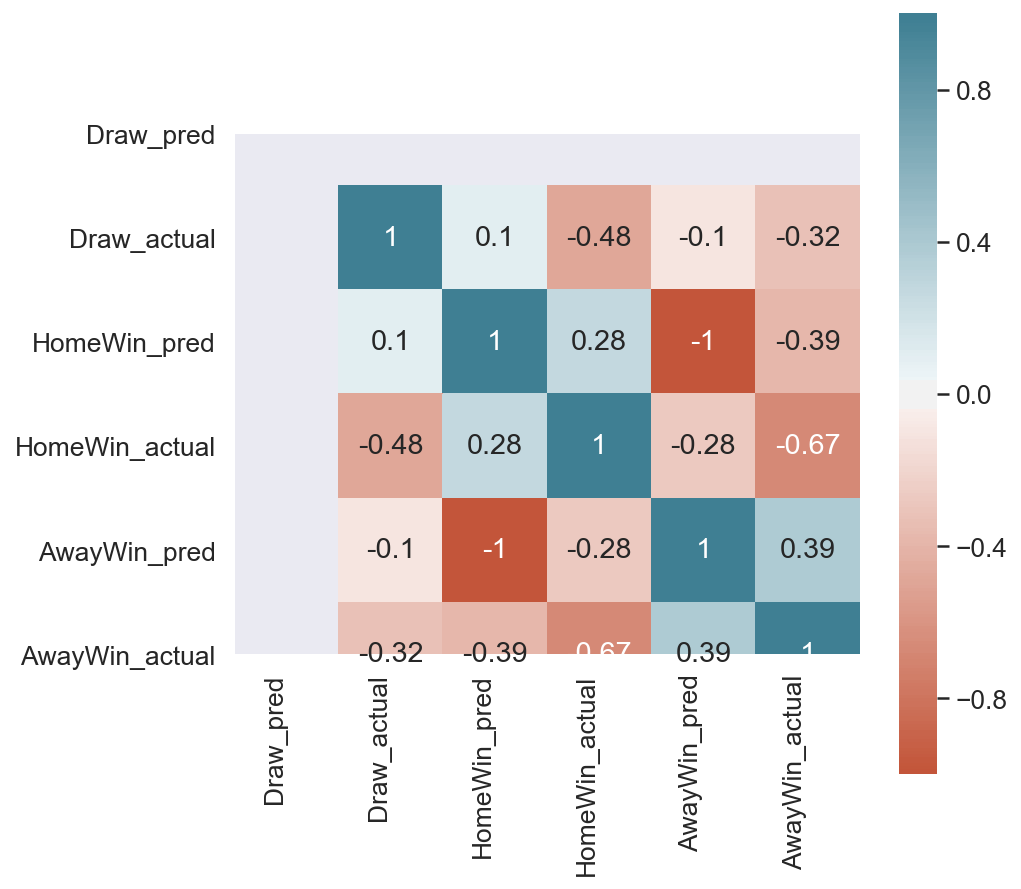

In [449]:
corr = model_data_med_test[['Draw_pred', 'Draw_actual', 'HomeWin_pred', 'HomeWin_actual', 'AwayWin_pred', 'AwayWin_actual']].corr()
ax = sns.heatmap(
    corr, 
    annot = True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    #rotation=45,
    horizontalalignment='right'
);